In [ ]:
# 로지스틱 회귀모델 머신러닝 연습하기

In [1]:
# 분석 데이터 검토
import pandas as pd
data = pd.read_csv('C:\datacampus\Ex_breastcancer.csv')
data

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


In [2]:
data['Class'].value_counts(sort=False)
# sort=False는 값 기준으로 정렬하지 않겠다는 의미
# value_counts()의 디폴트는 개수 많은 value부터 내림차순

0    444
1    239
Name: Class, dtype: int64

In [3]:
print(data.shape) # 행렬 구조 확인
# 683개의 데이터와 11개의 변수(속성). 여기서 683은 실제 변수가 아닌 환자 코드(code) 개수이므로 분석에서 X값으로 사용하면 안 된다

(683, 11)


In [8]:
# 특성(x)과 레이블(y) 데이터셋 나누기

# x 데이터셋
# 방법1 : 컬럼 이름으로 데이터셋 나누기
X1 = data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
print(X1.shape)

# 방법2 : 컬럼 인덱스(위치값)로 데이터셋 나누기
X2 = data[data.columns[1:10]]
print(X2.shape)

# 방법3 : loc 함수로 데이터셋 나누기 (단, 불러올 특성이 연달아 있어야 함)
X3 = data.loc[:, 'Clump_Thickness':'Mitoses']
print(X3.shape)

# y 데이터셋
y = data[['Class']] # [[]]이면 데이터프레임 형태 []이면 series 형태
print(y.shape)

(683, 9)
(683, 9)
(683, 9)
(683, 1)


In [9]:
# train-test 데이터셋 나누기

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, stratify=y, random_state=42)
# stratify = y : 훈련데이터와 테스트데이터 구분 시 레이블 범주 비율에 맞게 하라는 의미
# random_state : 분석할 때마다 다른 결과가 나오는 것을 막기 위해, 훈련데이터와 테스트데이터가 동일하게 나누어지도록 함

print(y_train.mean())
print(y_test.mean())
# y의 평균이 0.349, 0.351이므로, 환자1의 비율이 각각 34.9%, 35.1%로 나누어졌다는 뜻 (stratify=y 설정했기 때문)

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


In [11]:
# 정규화

# 정규화 라이브러리 sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler # min-max 정규화
from sklearn.preprocessing import StandardScaler # 표준화
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# train data 정규화

# min-max 방법
scaler_minmax.fit(X_train) # X_train을 MinMax 기능인 scaler_minmax를 이용해 적용(fit)하겠다는 의미
X_scaled_minmax_train = scaler_minmax.transform(X_train)
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# 표준화 방법
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.548241e-16,-1.543904e-16,-1.353084e-16,1.149254e-16,5.767956e-17,1.674008e-16,-2.775558e-17,-3.642919e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


In [13]:
# test data 정규화

# min-max 방법
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# 표준화 방법
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


In [15]:
# 모델 학습

# 로지스틱 회귀모델 적용
from sklearn.linear_model import LogisticRegression # 알고리즘 불러오기
model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train) # 로지스틱 모델 학습(fit)

pred_train = model.predict(X_scaled_minmax_train) # 예측치
model.score(X_scaled_minmax_train, y_train) # score : 정확도(accuracy) 확인

C:\Users\hayeo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.97265625

In [16]:
# 테스트데이터에 학습데이터 모델 적용
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.9590643274853801

In [18]:
# 혼동행렬(confusion matrix)

# train data
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬 : \n", confusion_train)

# test data
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬 : \n", confusion_test)

훈련데이터 오차행렬 : 
 [[328   5]
 [  9 170]]
테스트데이터 오차행렬 : 
 [[106   5]
 [  2  58]]


In [19]:
# 평가지표 - classfication_report

# train data
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print("분류예측 레포트 : \n", cfreport_train)

# test data
cfreport_test = classification_report(y_test, pred_test)
print("분류예측 레포트 : \n", cfreport_test)

분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512

분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [24]:
# 평가지표 - ROC curve

from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc # 100%에 가까울수록 좋은 모델

0.9923423423423423

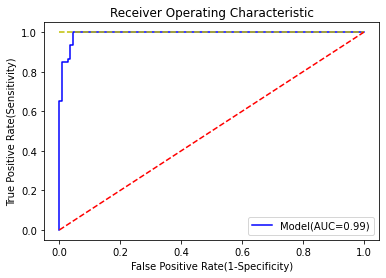

In [25]:
# ROC Curve 그리기
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model(AUC=%0.2f)'% roc_auc)
plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')

plt.legend(loc='lower right')
plt.show()
# 직선과 ROC 사이의 면적이 넓을수록 좋은 예측모델

In [26]:
# 예측값 병합 및 저장

# train data
prob_train = model.predict_proba(X_scaled_minmax_train) # 학습데이터의 예측 확률 컬럼을 생성해 prob_train에 저장
y_train[['y_pred']] = pred_train # 이미 진행한 예측 범주를 y_pred 컬럼에 추가
y_train[['y_prob0', 'y_prob1']] = prob_train # 확률은 2개(0정상, 1환자) 변수가 생성되므로 y_prob0, y_prob1로 추가
y_train

<ipython-input-26-3b3ef061b5cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[['y_pred']] = pred_train
C:\Users\hayeo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-3b3ef061b5cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [27]:
# test data
prob_test = model.predict_proba(X_scaled_minmax_test)
y_test[['y_pred']] = pred_test
y_test[['y_prob0', 'y_prob1']] = prob_test
y_test

<ipython-input-27-d1dcfe43de6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[['y_pred']] = pred_test
C:\Users\hayeo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-27-d1dcfe43de6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [28]:
# 데이터셋 병합 concat
# axis = 1이면 가로 병합, axis = 0이면 세로 병합

Total_test = pd.concat([X_test, y_test], axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0,0.983410,0.016590


In [29]:
# csv파일로 내보내기 및 저장
Total_test.to_csv("classification_test.csv")

In [32]:
pd.read_csv('Ex_breastcancer.csv')

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1
